## ایمپورت پکیج های مورد نیاز

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import confusion_matrix

## خواندن دیتاست آموزش

In [2]:
mobile_train = pd.read_csv('train.csv')

In [3]:
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## بررسی ستون های دیتافریم

In [4]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

در هیچ یک از بیست و یک ستون دیتافریم داده پوچ یا کمبود و فقدان داده نداریم.

## پیاده سازی روش انتخاب پیشرو

برای سادگی پیاده سازی, دیتافریم را براساس ستون بازه قیمتی گروه بندی می کنیم

دو کلاس دو و سه را که هزینه بالا و هزینه بسیار بالا بودند در یک کلاس گران یا بالا ادغام می کنیم : کلاس ۱

همچنین دو کلاس هزینه کم و هزینه متوسط را در یک کلاس ارزان یا پایین ادغام می کنیم: کلاس ۰

In [33]:
mobile_train.groupby('price_range')

In [34]:
mobile_train['price_range'].replace(1, 0, inplace=True)
#جایگزینی مقادیر ۱ با صفر در ستون بازه قیمتی
mobile_train['price_range'].replace([2, 3], 1, inplace=True)
#جایگزینی مقادیر دو و سه با یک
#بنابراین دو کلاس ۰ و ۱ خواهیم داشت. و تغییرات را بر دیتافریم اصلی اعمال کردیم

In [35]:
mobile_train['price_range'].value_counts()

0    1000
1    1000
Name: price_range, dtype: int64

## تقسیم سازی داده به آموزش و تست

تقسیم بندی دیتافریم به زیرمجموعه های آموزش و تست تصادفی

هشتاد درصد آموزش, بیست درصد تست و خروجی های متناسب با هریک

In [36]:
x_train, x_test, y_train, y_test = train_test_split(mobile_train.drop(columns=['price_range']),
                                                    mobile_train.price_range, test_size=0.2,
                                                    train_size=0.8,
                                                    random_state=0)

In [37]:
print(x_train.shape)
print(y_train.shape)
print('----------')
print(x_test.shape)
print(y_test.shape)

(1600, 20)
(1600,)
----------
(400, 20)
(400,)


In [38]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,1232,0,2.9,1,1,1,24,0.3,169,5,17,361,809,1257,16,10,16,1,0,0
159,1840,0,0.5,1,12,0,34,0.7,142,1,16,311,1545,1078,8,0,10,0,0,0
1827,1692,0,2.1,0,4,1,2,0.9,106,1,17,1899,1904,3779,9,3,7,1,1,1
318,508,0,0.8,0,7,1,42,0.3,94,1,8,39,557,663,13,12,7,1,0,0
708,977,1,2.8,1,2,0,35,0.6,165,2,15,1502,1862,3714,19,3,10,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1224,1,1.6,0,9,0,33,1.0,157,1,18,522,563,3796,10,5,13,1,1,0
1216,1158,0,0.7,1,1,1,29,0.7,123,2,20,311,1796,1542,17,9,15,1,0,1
1653,1190,0,2.0,1,0,0,40,0.2,93,5,1,1399,1646,3610,13,7,9,0,0,1
559,1191,0,2.4,1,2,0,13,0.9,169,1,7,179,1813,1028,14,6,8,1,1,1


In [39]:
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,1454,1,0.5,1,1,0,34,0.7,83,4,3,250,1033,3419,7,5,5,1,1,0
1190,1092,1,0.5,1,10,0,11,0.5,167,3,14,468,571,737,14,4,11,0,1,0
1132,1524,1,1.8,1,0,0,10,0.6,174,4,1,154,550,2678,16,5,13,1,0,1
731,1807,1,2.1,0,2,0,49,0.8,125,1,10,337,1384,1906,17,13,13,0,1,1
1754,1086,1,1.7,1,0,1,43,0.2,111,6,1,56,1150,3285,11,5,17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,955,0,0.5,1,4,0,43,0.9,143,5,8,1248,1511,1432,12,9,9,1,1,1
360,809,0,0.8,0,10,0,21,0.9,91,7,19,1453,1726,1274,18,7,3,0,0,0
1810,594,1,2.6,0,1,0,27,0.1,196,5,2,407,528,708,17,5,17,0,1,1
1743,1673,1,1.6,0,2,0,42,0.5,182,5,6,214,679,3094,12,4,20,0,0,0


In [40]:
y_train

582     0
159     0
1827    1
318     0
708     1
       ..
835     1
1216    0
1653    1
559     0
684     0
Name: price_range, Length: 1600, dtype: int64

In [41]:
y_test

405     1
1190    0
1132    1
731     1
1754    1
       ..
638     0
360     0
1810    0
1743    1
563     0
Name: price_range, Length: 400, dtype: int64

تعریف تابع انتخاب پیشرو

معیار انتخاب ویژگی جدید در هر مرحله هم آ اُ سی یا ناحیه زیر منحنی عملیاتی گیرنده می باشد

In [42]:
from sklearn.metrics import auc

که البته در اینجا مجاز به استفاده از پکیج نمی باشیم

به هر حال تعریف تابع انتخاب پیشرو

In [43]:
def forward_selection(x, y):
  features = []
  final_features = {'features': [], 'scores': []}
  removed_features = x.columns
  for i in range(len(x.columns)):
    max_score = 0
    best_feature = ""
    best_score = 0
    for feature in removed_features:
      new_x = x[features + [feature]]
      x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, train_size=0.8, random_state=0)
      # البته مسئله ما مسئله رگرسیون نیست, بلکه طبقه بندی می باشد
      lRegr = LogisticRegression()
      lRegr.fit(x_train, y_train)
      score = lRegr.score(x_test, y_test)
      if score > max_score :
        max_score = score
        best_feature = feature
        best_score = score
    removed_features = removed_features.drop(best_feature)
    features.append(best_feature)

    final_features['features'].append(best_feature)
    final_features['scores'].append(best_score)
  final_features['features_rank'] = range(len(x.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]
  return final_features

انتخاب ویژگی پیشرو با ارزیابی هر یک از ویژگیها شروع می شود و مواردی را انتخاب می کند که به بهترین عملکرد مدل الگوریتم انتخاب شده منجر شود

بهترین چیست؟!این کاملاً به معیارهای ارزیابی تعریف شده (ناحیه زیر منحنی عملیاتی گیرنده, دقت تخمین, جذر ميانگين مجذور خطا و ...) بستگی دارد

در مرحله بعد، تمام ترکیبات ممکن از ویژگی انتخاب شده و ویژگی بعدی مورد ارزیابی قرار می گیرند و ویژگی دوم انتخاب می شود و به همین ترتیب تا زمانی که تعداد مشخصه از پیش تعریف شده مورد نیاز انتخاب شود

استاندارد کردن ویژگی ها با حذف میانگین و مقیاس بندی به واریانس واحد

In [44]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

In [45]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,-0.001608,-0.965592,1.671035,0.983880,-0.748114,0.976525,-0.430667,-0.692543,0.852842,0.216380,1.183752,-0.660982,-1.042159,-0.786095,0.882404,0.951809,0.911171,0.564840,-0.986343,-1.025320
159,1.374075,-0.965592,-1.270550,0.983880,1.810037,-1.024039,0.119443,0.693843,0.084708,-1.543255,1.018941,-0.773314,0.655005,-0.952286,-1.032614,-1.324225,-0.183466,-1.770414,-0.986343,-1.025320
1827,1.039205,-0.965592,0.690506,-1.016384,-0.050436,0.976525,-1.640908,1.387036,-0.939471,-1.543255,1.183752,2.794355,1.482833,1.555428,-0.793236,-0.641415,-0.730784,0.564840,1.013846,0.975305
318,-1.639756,-0.965592,-0.902852,-1.016384,0.647241,0.976525,0.559530,-0.692543,-1.280863,-1.543255,-0.299543,-1.384401,-1.623253,-1.337588,0.164273,1.407015,-0.730784,0.564840,-0.986343,-1.025320
708,-0.578580,1.035635,1.548469,0.983880,-0.515555,-1.024039,0.174453,0.347246,0.739044,-1.103346,0.854131,1.902438,1.385984,1.495079,1.600536,-0.641415,-0.183466,-1.770414,1.013846,0.975305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.019709,1.035635,0.077676,-1.016384,1.112359,-1.024039,0.064432,1.733633,0.511449,-1.543255,1.348562,-0.299272,-1.609417,1.571211,-0.553859,-0.186208,0.363853,0.564840,1.013846,-1.025320
1216,-0.169043,-0.965592,-1.025418,0.983880,-0.748114,0.976525,-0.155612,0.693843,-0.455831,-1.103346,1.678183,-0.773314,1.233793,-0.521490,1.121782,0.724205,0.728731,0.564840,-0.986343,0.975305
1653,-0.096639,-0.965592,0.567940,0.983880,-0.980673,-1.024039,0.449508,-1.039140,-1.309313,0.216380,-1.453217,1.671033,0.887904,1.398522,0.164273,0.268999,-0.365905,-1.770414,-0.986343,0.975305
559,-0.094376,-0.965592,1.058205,0.983880,-0.515555,-1.024039,-1.035787,1.387036,0.852842,-1.543255,-0.464354,-1.069871,1.272994,-0.998708,0.403650,0.041395,-0.548344,0.564840,1.013846,0.975305


In [46]:
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

In [47]:
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,0.500697,1.035635,-1.270550,0.983880,-0.748114,-1.024039,0.119443,0.693843,-1.593807,-0.223529,-1.123596,-0.910359,-0.525631,1.221190,-1.271991,-0.186208,-1.095663,0.564840,1.013846,-1.025320
1190,-0.318377,1.035635,-1.270550,0.983880,1.344919,-1.024039,-1.145809,0.000650,0.795943,-0.663437,0.689320,-0.420591,-1.590970,-1.268884,0.403650,-0.413811,-0.001026,-1.770414,1.013846,-1.025320
1132,0.659082,1.035635,0.322808,0.983880,-0.980673,-1.024039,-1.200820,0.347246,0.995089,-0.223529,-1.453217,-1.126037,-1.639394,0.533217,0.882404,-0.186208,0.363853,0.564840,-0.986343,0.975305
731,1.299408,1.035635,0.690506,-1.016384,-0.515555,-1.024039,0.944607,1.040440,-0.398932,-1.543255,0.030078,-0.714901,0.283750,-0.183538,1.121782,1.634619,0.363853,-1.770414,1.013846,0.975305
1754,-0.331953,1.035635,0.200242,0.983880,-0.980673,0.976525,0.614541,-1.039140,-0.797224,0.656289,-1.453217,-1.346208,-0.255837,1.096779,-0.314482,-0.186208,1.093610,0.564840,1.013846,-1.025320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,-0.628358,-0.965592,-1.270550,0.983880,-0.050436,-1.024039,0.614541,1.387036,0.113158,0.216380,-0.299543,1.331790,0.576603,-0.623619,-0.075105,0.724205,-0.365905,0.564840,1.013846,0.975305
360,-0.958703,-0.965592,-0.902852,-1.016384,1.344919,-1.024039,-0.595700,1.387036,-1.366212,1.096197,1.513373,1.792352,1.072378,-0.770312,1.361159,0.268999,-1.460541,-1.770414,-0.986343,-1.025320
1810,-1.445170,1.035635,1.303337,-1.016384,-0.748114,-1.024039,-0.265634,-1.385736,1.620976,0.216380,-1.288406,-0.557636,-1.690125,-1.295809,1.121782,-0.186208,1.093610,-1.770414,1.013846,0.975305
1743,0.996215,1.035635,0.077676,-1.016384,-0.515555,-1.024039,0.559530,0.000650,1.222684,0.216380,-0.629164,-0.991239,-1.341929,0.919447,-0.075105,-0.413811,1.640928,-1.770414,-0.986343,-1.025320


بعد از نرمال سازی آن را به تابع انتخاب پیشرو پاس می دهیم

In [48]:
fs_result = forward_selection(x_train, y_train)

In [49]:
best_features = fs_result['best_features']
best_features

['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']

<BarContainer object of 20 artists>

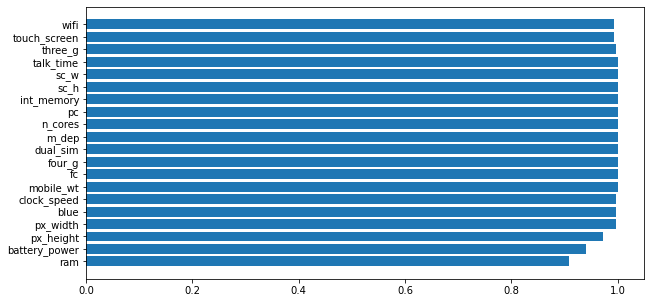

In [50]:
plt.figure(figsize=(10, 5))
plt.barh(y= fs_result['features'], width=fs_result['scores'])

## 2

‍بر اساس ویژگی های انتخاب شده از مرحله قبل مدل لجستیک را بر روی این ویژگی ها اجرا می کنیم.

و گزارش معیارهای:

precision, recall, f1-score

In [51]:
lReg = LogisticRegression()
lReg.fit(x_train[best_features], y_train)
y_prediction = lReg.predict(x_test[best_features])
print(classification_report(y_prediction, lReg.predict(x_test[best_features])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       210

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



## 3

با استفاده از متد پی سی ای می خواهیم ابعاد دیتاست اولیه خود را تغییر دهیم و به اندازه تعداد ویژگی های انتخاب شده در مرحله قبل برسانیم

آیا هنوز بیشتر اطلاعات دیتاست بزرگ را می توانیم با این دیتاست کوچک داشته باشیم؟

In [53]:
pca = PCA(6)
pca.fit(x_train)
train_pca = pca.transform(x_train)
test_pca = pca.transform(x_test)

In [54]:
print(train_pca)
print('--------------------------------------------------------------------------------')
print(test_pca)

[[-0.03090053  0.83699099 -0.6616837  -1.49217413 -0.28761223  0.86622267]
 [ 2.80600422 -0.98248843  0.37053512  1.18870343  0.52158758 -0.88566447]
 [-0.27879097  1.51756702  1.04676325  3.26643398 -0.20239044 -0.28294849]
 ...
 [-1.55335972 -2.09873363  1.9254626   0.30795069  1.74410767 -0.8614723 ]
 [-0.67027677 -0.41775575  0.30671903  0.41845966  0.3712275   1.49501715]
 [ 1.87083111  2.11445127 -0.62504208 -0.14202473  1.89019558 -0.1930834 ]]
--------------------------------------------------------------------------------
[[-0.52252787 -1.27200017 -1.49647187 -0.20351181  0.31861004 -0.37060044]
 [ 2.1114497  -0.91565373  0.37494072 -0.96213438 -0.19080803  1.80875491]
 [-0.60211259 -1.24432288 -1.10796711 -1.67699716  0.41632247  0.37349437]
 ...
 [-0.15073057 -2.31455224  0.21258421 -1.90806715 -0.83593639  1.82643486]
 [ 1.00370984 -2.37413844 -0.41537545 -1.35104157 -1.31896065 -1.46354005]
 [-0.333515   -1.96484046  0.5479986  -0.09561476 -1.13044602  1.54661187]]


## 4

با استفاده از دیتاست تغییر یافته در مرحله قبل یک رگرسیون لجستیک را پیاده سازی می کنیم

و گزارش معیارهای

f1-score, recall, precision

In [55]:
lReg.fit(train_pca, y_train)
print(classification_report(y_test, lReg.predict(test_pca)))

              precision    recall  f1-score   support

           0       0.59      0.68      0.64       187
           1       0.68      0.59      0.63       213

    accuracy                           0.63       400
   macro avg       0.64      0.64      0.63       400
weighted avg       0.64      0.63      0.63       400



## مهندسی ویژگی

## 6 الف

 استفاده از روش بینینگ بر روی ویژگی قدرت باتری
    و استفاده از اندازه بین های مختلف

In [56]:
# تقسیم سازی و مرتب سازی مقادیر داده ها در بین ها و ذخیره سازی آن بعنوان یک ستون در دیتافریم اصلی
mobile_train['battery_bins'] = pd.cut(mobile_train.battery_power, bins= 4, labels=[0, 1, 2, 3])

In [57]:
mobile_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_bins
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,0,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,1,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,1,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,1,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,1,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,2


تقسیم سازی به داده آموزش و تست به نسبت هشتاد درصد به بیست درصد

In [58]:
x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(
                                                                    mobile_train.drop(columns=['price_range']),
                                                                    mobile_train.price_range,
                                                                    test_size=0.2,
                                                                    train_size=0.8,
                                                                    random_state=0)

In [59]:
x_train_bin

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,battery_bins
582,1232,0,2.9,1,1,1,24,0.3,169,5,...,361,809,1257,16,10,16,1,0,0,1
159,1840,0,0.5,1,12,0,34,0.7,142,1,...,311,1545,1078,8,0,10,0,0,0,3
1827,1692,0,2.1,0,4,1,2,0.9,106,1,...,1899,1904,3779,9,3,7,1,1,1,3
318,508,0,0.8,0,7,1,42,0.3,94,1,...,39,557,663,13,12,7,1,0,0,0
708,977,1,2.8,1,2,0,35,0.6,165,2,...,1502,1862,3714,19,3,10,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1224,1,1.6,0,9,0,33,1.0,157,1,...,522,563,3796,10,5,13,1,1,0,1
1216,1158,0,0.7,1,1,1,29,0.7,123,2,...,311,1796,1542,17,9,15,1,0,1,1
1653,1190,0,2.0,1,0,0,40,0.2,93,5,...,1399,1646,3610,13,7,9,0,0,1,1
559,1191,0,2.4,1,2,0,13,0.9,169,1,...,179,1813,1028,14,6,8,1,1,1,1


In [60]:
x_test_bin

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,battery_bins
405,1454,1,0.5,1,1,0,34,0.7,83,4,...,250,1033,3419,7,5,5,1,1,0,2
1190,1092,1,0.5,1,10,0,11,0.5,167,3,...,468,571,737,14,4,11,0,1,0,1
1132,1524,1,1.8,1,0,0,10,0.6,174,4,...,154,550,2678,16,5,13,1,0,1,2
731,1807,1,2.1,0,2,0,49,0.8,125,1,...,337,1384,1906,17,13,13,0,1,1,3
1754,1086,1,1.7,1,0,1,43,0.2,111,6,...,56,1150,3285,11,5,17,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,955,0,0.5,1,4,0,43,0.9,143,5,...,1248,1511,1432,12,9,9,1,1,1,1
360,809,0,0.8,0,10,0,21,0.9,91,7,...,1453,1726,1274,18,7,3,0,0,0,0
1810,594,1,2.6,0,1,0,27,0.1,196,5,...,407,528,708,17,5,17,0,1,1,0
1743,1673,1,1.6,0,2,0,42,0.5,182,5,...,214,679,3094,12,4,20,0,0,0,3


In [61]:
y_train_bin

582     0
159     0
1827    1
318     0
708     1
       ..
835     1
1216    0
1653    1
559     0
684     0
Name: price_range, Length: 1600, dtype: int64

In [62]:
y_test_bin

405     1
1190    0
1132    1
731     1
1754    1
       ..
638     0
360     0
1810    0
1743    1
563     0
Name: price_range, Length: 400, dtype: int64

In [75]:
bin_svm = svm.SVC()
classifier = bin_svm.fit(x_train_bin.drop(columns='battery_power'), y_train_bin)

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

In [71]:
confusionMatrix = confusion_matrix(y_test_bin, bin_svm.predict(x_test_bin.drop(columns='battery_power')))
confusionMatrix

array([[175,  12],
       [ 14, 199]], dtype=int64)

In [79]:
display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)

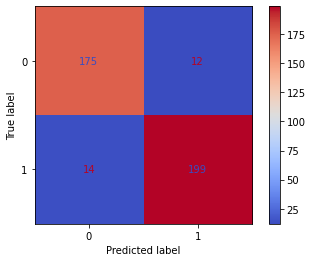

In [82]:
display.plot(cmap = 'coolwarm')

In [83]:
pd.cut(x_train_bin.battery_power, bins = 10).value_counts()

(499.503, 650.7]    180
(800.4, 950.1]      175
(650.7, 800.4]      167
(1848.3, 1998.0]    165
(950.1, 1099.8]     158
(1548.9, 1698.6]    157
(1698.6, 1848.3]    153
(1399.2, 1548.9]    151
(1249.5, 1399.2]    148
(1099.8, 1249.5]    146
Name: battery_power, dtype: int64

In [84]:
min(x_train_bin.battery_power)

501

In [85]:
max(x_train_bin.battery_power)

1998

In [86]:
cb = [min(x_train_bin.battery_power), 700, 1000, 1300, 1600, max(x_train_bin.battery_power)]
pd.cut(x_train_bin.battery_power, bins = cb).value_counts()

(1600, 1998]    410
(700, 1000]     345
(1300, 1600]    311
(1000, 1300]    302
(501, 700]      230
Name: battery_power, dtype: int64

## 6 ب

استخراج ویژگی ها رده ای یا همان

categorical

In [129]:
categorical_features = []
for feature in mobile_train.columns.to_list():
  if ( len(mobile_train[feature].unique()) < 3 ):
    categorical_features.append(feature)

categorical_features.remove('price_range')
categorical_features

['blue_0_0',
 'blue_0_1',
 'blue_1_0',
 'blue_1_1',
 'dual_sim_0_0',
 'dual_sim_0_1',
 'dual_sim_1_0',
 'dual_sim_1_1',
 'four_g_0_0',
 'four_g_0_1',
 'four_g_1_0',
 'four_g_1_1',
 'three_g_0_0',
 'three_g_0_1',
 'three_g_1_0',
 'three_g_1_1',
 'touch_screen_0_0',
 'touch_screen_0_1',
 'touch_screen_1_0',
 'touch_screen_1_1',
 'wifi_0_0',
 'wifi_0_1',
 'wifi_1_0',
 'wifi_1_1']

In [130]:
# تبدیل متغیر رده ای را به متغیرهای ساختگی/شاخص 
mobile_train = pd.get_dummies(mobile_train, columns=categorical_features, prefix=categorical_features)
mobile_train.sample(3)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,touch_screen_1_1_0,touch_screen_1_1_1,wifi_0_0_0,wifi_0_0_1,wifi_0_1_0,wifi_0_1_1,wifi_1_0_0,wifi_1_0_1,wifi_1_1_0,wifi_1_1_1
13,803,2.1,7,17,1.0,198,4,11,344,1440,...,1,0,0,1,1,0,1,0,0,1
521,1128,1.1,9,46,0.9,135,8,10,751,1582,...,1,0,1,0,0,1,0,1,1,0
1225,721,0.5,6,6,0.4,194,4,9,1446,1988,...,1,0,0,1,1,0,1,0,0,1


In [133]:
x_train_one_hot, x_test_one_hot, y_train_one_hot, y_test_one_hot = train_test_split(
    mobile_train.drop(columns=['price_range', 'battery_bins', 'log_fc', 'area']), 
    mobile_train.price_range, test_size=0.2, train_size=0.8, random_state=0)

In [134]:
one_hot_svm = svm.SVC()
classifier2 = one_hot_svm.fit(x_train_one_hot, y_train_one_hot)

In [136]:
confusionMatrix2 = confusion_matrix(y_test_one_hot, one_hot_svm.predict(x_test_one_hot))
confusionMatrix2

array([[186,   1],
       [  5, 208]], dtype=int64)

In [138]:
display2 = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix2)

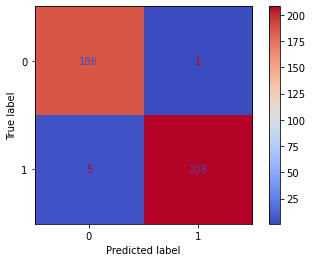

In [139]:
display2.plot(cmap = 'coolwarm')

دلیل استفاده از

one hot encoding

بسیاری از مدل ها، امکان انجام پردازش مستقیم و بدون انجام «کدبندی»  را روی داده های طبق ای ندارند

بطور کل برای طبقه بندی داده های کتوگوریکال استفاده می شود 

عملکرد آن به جز در مواردی که متغیر دسته ای مقادیر خیلی زیادی بگیرد، بسیار خوب است معمولا پانزده

کد بندی وان هات ستون های دودویی جدیدی می سازد که هر یک مربوط به یکی از مقادیری هستند که متغیر به خود می گیرد

می توان گفت برای این است که بتوانیم روی داده ی عددی به گونه ای کار کنیم

# 6 ج

<AxesSubplot:>

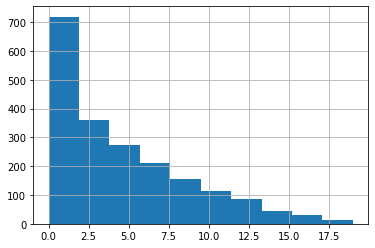

In [108]:
mobile_train.fc.hist()

<AxesSubplot:>

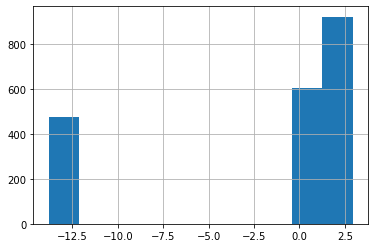

In [110]:
np.log(mobile_train.fc+0.000001).hist()

In [93]:
mobile_train['log_fc'] = np.log(mobile_train.fc+0.000001)

In [95]:
mobile_train['log_fc']

0       9.999995e-07
1      -1.381551e+01
2       6.931477e-01
3      -1.381551e+01
4       2.564949e+00
            ...     
1995   -1.381551e+01
1996   -1.381551e+01
1997    9.999995e-07
1998    1.386295e+00
1999    1.609438e+00
Name: log_fc, Length: 2000, dtype: float64

In [99]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(mobile_train.drop(columns=['price_range', 'battery_bins', 'fc']), 
                                                                    mobile_train.price_range,
                                                                    test_size=0.2,
                                                                    train_size=0.8,
                                                                    random_state=0)

In [102]:
log_svm = svm.SVC()
classifier1 = log_svm.fit(x_train_log, y_train_log)

In [104]:
confusionMatrix1 = confusion_matrix(y_test_log, log_svm.predict(x_test_log))
confusionMatrix1

array([[186,   1],
       [  5, 208]], dtype=int64)

In [105]:
display1 = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix1)

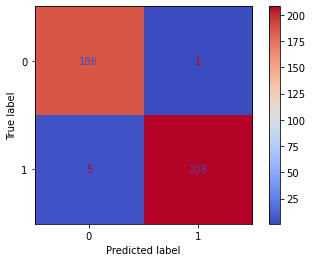

In [106]:
display1.plot(cmap = 'coolwarm')

## 6 ج

تبدیل لاگ را می توان برای کم کردن خمیدگی یا چولگی توزیع های با چولگی زیاد استفاده کرد

برای تفسیر پذیرتر کردن الگوهای موجود در داده ها

## 6 د

In [113]:
mobile_train['area'] = mobile_train.sc_w * mobile_train.sc_h
mobile_train['area']

0        63
1        51
2        22
3       128
4        16
       ... 
1995     52
1996    110
1997      9
1998    180
1999     76
Name: area, Length: 2000, dtype: int64

## 8

بوت استرپینگ چیست

از روی یک دیتاست اورجینال بی تا دیتاست بوت استرپ می سازیم. مثل این است که یه کیسه داشته باشیم و در آن دست کنیم و یک مورد را برداریم و به دیتاست بوت استرپ خود اضافه کنیم و دوباره آن را سر جای خود بگذاریم. پس امکان دارد آن مورد قبل دوباره تکرار شود.

بی تا دیتاست می توان از روی دیتاست اصلی ساخت. بطور میانگین دیتاست بوت استرپ دو سوم دیتاهای اورجینال را دارند

دلیل استفاده از بوت استرپ

معمولا می خواهیم یک پارامتری را تخمین بزنیم پارامتری را که می خواهیم تخمین بزنیم از روی دیتاست اول محاسبه می کنیم سپس از روی دیتاست دوم محاسبه می کنیم و همین طور الی آخر برای هر بی تا دیتاست بوت استرپ.

بعد این ها را با هم جمع می کنیم و تقسیم بر تعداد می کنیم یعنی میانگین می گیریم. که واریانس کم می شود و تخمین به مقدار واقعی نزدیک می شود

تفاوت بوت استرپینگ با کراس ولیدیشن در این است که کراس ولیدیشن خود دیتاست اصلی را تکه می کند و به چندین دیتاست تقسیم می کند. در واقع مثل مثال کیسه ای که زدیم مقدادیر را برنمی گرداند تا امکان تکرار امکان آنها وجود داشته باشد

سایز دیتاست هایی که با کراس ولیدیشن هم ساخته می شوند کوچکتر و کسری از دیتافریم اصلی است. ولی دیتاست های بوت استرپ سایزشان برابر با دیتاست اصلی است

## 9

5x2 Cross Validation

همانطور که از اسمش مشخص هست این تست برای هر طبقه بند پنج بار 

2-fold cross validation

را اجرا می کند.

2-fold

یعنی داده را در هر مرتبه به دو نیم تقسیم می کند نیمی برای آموزش و نیمی برای تست

از اختلاف امتیاز برای محاسبه آماره تی استفاده می شود

## 10

الگوریتم های مختلف ساخت درخت تصمیم

به طور کلی چهار الگوریتم درخت تصمیم محبوب وجود دارد

ID3, CART (Classification and Regression Trees), Chi-Square و Reduction in Variance



ID3

آی دی تری از اینفورمیشن گین استفاده می کند اینفورمیشن گین برای ارزیابی این است که یک ویژگی چقد برای تقسیم بندی مناسب است

در واقع در مسائل دسته بندی با استفاده از درخت تصمیم با دو چالش مواجه هستیم یکی انتخاب ویژگی مناسب و دیگر نقطه جداسازی یا همان اسپیلیتینگ پوینت

این اینفورمیشن گین تفاوت آنتروپی قبل و بعد از تقسیم بندی را محاسبه می کند که هرچقدر این مقدار بزرگتر باشد برای ما مناسب تر است

حال الگوریتم آی دی تری برای تصمیم گیری در مورد نقاط جداسازی از این اینفورمیشن گین استفاده می کند

CART

دیگر الگوریتم ساخت درخت سی ای آر تی یا درخت های طبقه بندی و رگرسیون می باشد

این الگوریتم از متد جینی (جینی ایندکس و جینی گین) برای ایجاد نقاط جداسازی استفاده می کند

جینی ایندکس احتمال تخصیص یک برچسب اشتباه به یک نمونه با انتخاب یک برچسب به طور تصادفی و همچنین برای اندازه گیری اهمیت ویژگی در یک درخت استفاده می شود

به طور کلی تفاوت الگوریتم های مختلف ساخت درخت در انتخاب نقطه جداسازی می باشد

## 11

In [147]:
categorical_features1 = []
for feature in mobile_train.columns.to_list():
  if ( len(mobile_train[feature].unique()) < 3 ):
    categorical_features1.append(feature)

categorical_features1.remove('price_range')

In [151]:
#Converting categorical variables into dummies/indicator variables
mobile_train_getdummy = pd.get_dummies(data=mobile_train, columns=categorical_features1)

In [152]:
#Separating the training set and test set
X = mobile_train_getdummy.drop('price_range',axis=1)
Y = mobile_train_getdummy['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [153]:
#importing Decision Tree Classifier via sklean
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

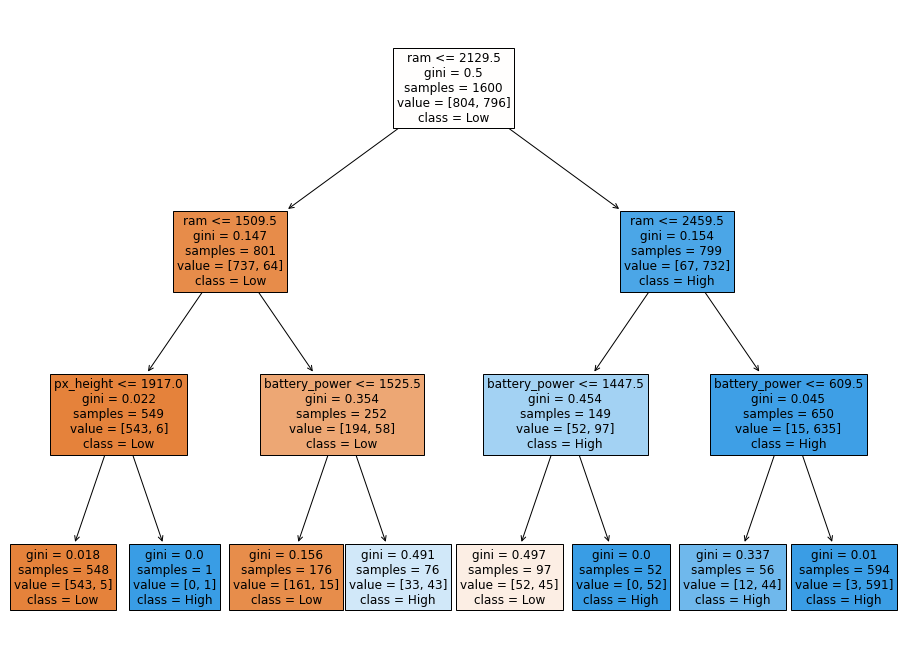

In [154]:
#visualising the decision tree diagram
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=mobile_train_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Low', 'High'])

## 12

عمق درخت و تعداد نمونه های موجود و تعدد گره ها می تواند باعث خلوص گره ها شود

node purity

## 13

گاهی ممکن است ساخت درخت کامل روی دیتاست آموزش تخمین خوبی ایجاد کند ولی روی داده تست خوب کار نکند و بیش برازش یا آورفیت شود

آنقدر جداسازی را ادامه می دهیم که در هرشاخه یا جعبه مثلا پنج داده داشته باشیم می توانیم یک محک توقف قرار دهیم مثلا آنقدر تقسیم بندی بکنیم که در هر ناحیه مثلا یک داده داشته باشیم

در این حالت آر اس اس صفر می شود ولی اگر تعداد داده ها در هر ناحیه خیلی کوچک شود آر اس اس نیز خیلی کوچک می شود و به عبارتی می گوییم برای این داده های آموزش خیلی خوب فیت و آموزش داده شده

به دلیل جداسازی زیاد آورفیتینگ یا بیش برازش به وجود می آید پس کم کردن این جداسازی ها خوب می باشد. پس درخت را هرس می کنیم

اگر درخت کوچکتری داشته باشیم که تعداد جداسازی های کمتری نسبت به آن داشته باشیم واریانس را پایین می آورد و بایاس نیز تا حد معقولی پایین می آید و تریدآف بین این دو حفظ می شود

## 14

در نمودار بایاس واریانس آن جایی که دو خط واریانس و بایاس هم دیگر را قطع می کنند تریدآف بین این دو می باشد و میزان مناسب میانگین خطاست

## Backward Selection

In [160]:
def backward_selection(x, y):
  features = x.columns
  final_features = {'features': [], 'scores': []}
  removed_features = x.columns
  for i in range(len(x.columns)):
    max_score = 0
    worst_feature = ""
    worst_score = 0
    for feature in removed_features:
      new_X = x[features.drop(feature)]
      x_train, x_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, train_size=0.8, random_state=0)
      lRegr = LogisticRegression()
      lRegr.fit(x_train, y_train)
      score = lRegr.score(x_test, y_test)
      if score > max_score :
        max_score = score
        worst_feature = feature
        worst_score = score
    removed_features = removed_features.drop(worst_feature)
    features.drop(worst_feature)

    final_features['features'].append(worst_feature)
    final_features['scores'].append(worst_score)
  final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]

  
  return final_features

In [161]:
backwardSelection = backward_selection(x_train, y_train)
print(backwardSelection)

{'features': ['dual_sim', 'pc', 'blue', 'px_height', 'px_width', 'sc_w', 'n_cores', 'm_dep', 'wifi', 'clock_speed', 'touch_screen', 'battery_power', 'four_g', 'int_memory', 'mobile_wt', 'talk_time', 'fc', 'ram', 'three_g', 'sc_h'], 'scores': [0.525, 0.515625, 0.509375, 0.509375, 0.50625, 0.5, 0.496875, 0.490625, 0.490625, 0.484375, 0.484375, 0.48125, 0.48125, 0.48125, 0.478125, 0.478125, 0.475, 0.475, 0.475, 0.465625], 'features_rank': range(0, 113), 'best_features': []}


In [162]:
featuresbs = backwardSelection['features']

In [165]:
lReg = LogisticRegression()
lReg.fit(x_train[featuresbs], y_train)
y_prdediction = lReg.predict(x_test[featuresbs])

In [166]:
print(classification_report(y_prediction, lReg.predict(x_test[featuresbs])))

              precision    recall  f1-score   support

           0       0.52      0.56      0.54       190
           1       0.58      0.54      0.56       210

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



## Statistical significance tests

مدل ها معمولاً با استفاده از روش های نمونه گیری مجدد مانند اعتبارسنجی متقاطع کی فولد که در آن میانگین پارامترها محاسبه و به طور مستقیم مقایسه می شوند، ارزیابی می شوند

اگرچه ساده است، اما این رویکرد می تواند گمراه کننده باشد و منجر به نتایج و تصورات اشتباه شود، زیرا تشخیص اینکه تفاوت بین میانگین پارامترها واقعی است یا نتیجه یک تصادف آماری است دشوار است

statistical significance tests

برای حل این مشکل طراحی شده اند برای رسیدگی به این مشکل و تعیین کمیت احتمال مشاهده نمونه ها با این فرض طراحی شده اند که از توزیع یکسان گرفته شده اند. اگر این فرض یا فرضیه صفر رد شود، نشان می دهد که تفاوت از نظر آماری معنی دار است

اگرچه آزمون فرضیه های آماری بی اشتباه نیست، اما می تواند اعتماد شما را در تفسیر و ارائه نتایج در طول انتخاب مدل بهبود بخشد

## Matthews Correlation Coefficient

به عنوان معیاری برای کیفیت طبقه بندی های باینری (دو کلاسه) استفاده می شود

اگر بیشتر داده ها در امتداد سلول های مورب قرار گیرند، دو متغیر باینری به طور مثبت مرتبط در نظر گرفته می شوند. در مقابل، اگر بیشتر داده ها از حالت مورب بودن خارج شوند، دو متغیر باینری به طور منفی مرتبط در نظر گرفته می شوند